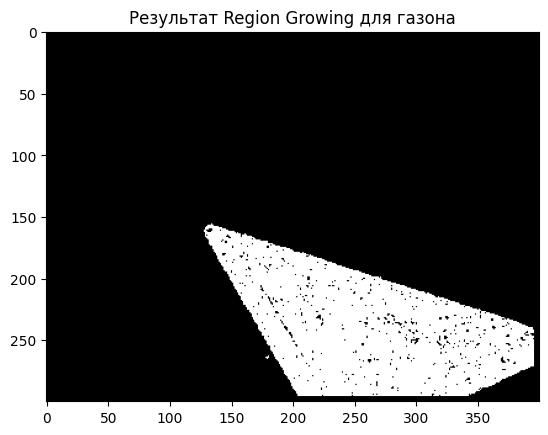

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage


image = cv2.imread('sar_1 (1).jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def homo_median(img, mask, point, T):
    median_val = np.median(img[mask > 0])  
    if abs(median_val - img[point]) <= T:
        return True
    return False


def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1  
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
    return mask * 255


seed_point = (250, 250)  
r = 4  
T = 18  


mask = region_growing(image_gray, seed_point, homo_median, r, T)


plt.imshow(mask, cmap="gray")
plt.title("Результат Region Growing для газона")
plt.show()

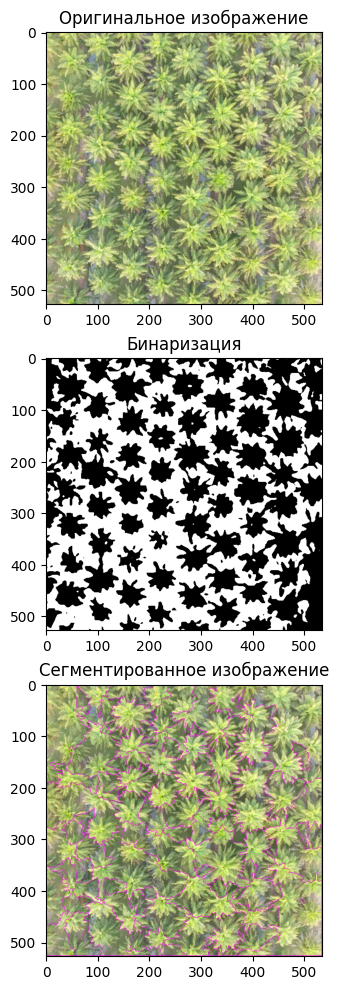

Количество пальм: 100


In [4]:

image = cv2.imread("palm_1.JPG")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(image_gray, (13, 13), 0)


ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)


local_maxima = ndimage.maximum_filter(dist_transform, size=20, mode='constant')


ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)


ret, markers = cv2.connectedComponents(sure_fg)


markers = cv2.watershed(image, markers.astype(np.int32))


num = len(np.unique(markers)) - 1  


segmented_image = image.copy()
segmented_image[markers == -1] = [255, 0, 255]  

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригинальное изображение")
plt.subplot(3, 1, 2)
plt.imshow(thresh, cmap="gray")
plt.title("Бинаризация")
plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Сегментированное изображение")
plt.show()
print("Количество пальм:", num)